In [1]:
# enviroment tanima
import gym  # OpenAI Gym ortamları için
import random  # Rastgele seçimler için
import numpy as np  # Sayısal işlemler için

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)  # Eski uyarıları gizle

environment = gym.make("FrozenLake-v1", is_slippery=False, render_mode="ansi")  # FrozenLake ortamını oluştur, kayganlık yok, metinsel çıktı

environment.reset()  # Ortamı sıfırla, başlangıç durumuna getir
print(environment.render())  # Ortamın o anki durumunu yazdır

"""
SFFF
FHFH
FFFH
HFFG

S: Start (Başlangıç noktası)
G: Goal (Hedef)
F: Frozen (Donmuş alan)
H: Hole (Delik)
"""

nb_states = environment.observation_space.n  # Toplam durum sayısı: 16
nb_actions = environment.action_space.n  # Toplam eylem sayısı: 4

# Q table: durum sayısı x eylem sayısı (16 x 4), tüm değerler sıfırla başlatıldı
q_table = np.zeros((nb_states, nb_actions))

"""
Eylemler:
0: Left (Sol)
1: Down (Aşağı)
2: Right (Sağ)
3: Up (Yukarı)
"""

action = environment.action_space.sample()  # Rastgele bir eylem seç
new_state, reward, done, info, _ = environment.step(action)  # Ortamda seçilen eylemi uygula, yeni durumu, ödülü ve bitiş durumunu al
print(environment.render())  # Yeni ortam durumunu yazdır


SFFF
FHFH
FFFH
HFFG

  (Down)
SFFF
FHFH
FFFH
HFFG



q table before training : [[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

Qtable after training:
[[0.        0.59049   0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.6561    0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.729     0.       ]
 [0.        0.81      0.        0.       ]
 [0.        0.4359375 0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.9       0.       ]
 [0.        0.        1.        0.       ]
 [0.        0.        0.        0.       ]]


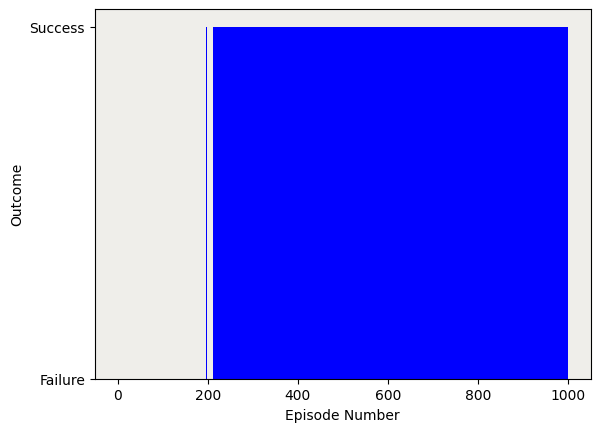

In [2]:
import matplotlib.pyplot as plt
import gym
import random
import numpy as np

environment = gym.make("FrozenLake-v1", is_slippery=False)  # Ortamı oluştur, kayganlık kapalı
environment.reset()  # Ortamı sıfırla

# Q tablosu başlatma (durum sayısı x eylem sayısı)
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))  # 16 x 4 matris

# Hiperparametreler
episodes = 1000  # Toplam eğitim bölümü sayısı
alpha = 0.5  # Öğrenme oranı
gamma = 0.9  # İndirgeme faktörü (discount factor)

# Sonuçların saklanacağı liste
outcomes = []

print(f"q table before training : {qtable}")

# Eğitim döngüsü
for _ in range(episodes):
    state, _ = environment.reset()  # Ortamı resetle, başlangıç durumunu al
    done = False
    outcomes.append("Failure")  # Başlangıçta başarısızlık olarak işaretle

    while not done:
        # Eylem seçimi (epsilon-greedy yerine q değeri kontrolü)
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])  # En yüksek Q değerine sahip eylem seçilir
        else:
            action = environment.action_space.sample()  # Rastgele eylem seç

        # Seçilen eylemi uygula
        new_state, reward, done, info, _ = environment.step(action)

        # Q tablosunu güncelle
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        state = new_state  # Durumu güncelle

        if reward:  # Eğer ödül alındıysa (başarı)
            outcomes[-1] = "Success"

print()
print("Qtable after training:")
print(qtable)

# Eğitim sonuçlarını görselleştir
plt.figure()
plt.xlabel("Episode Number")
plt.ylabel("Outcome")
ax = plt.gca()
ax.set_facecolor("#efeeea")  # Grafik arkaplan rengi
plt.bar(range(len(outcomes)), outcomes, color="blue", width=1)  # Başarı/başarısızlıkları göster
plt.show()

In [3]:
# %% Evaluation (Değerlendirme)

episodes = 100  # Değerlendirilecek bölüm sayısı
nb_success = 0  # Başarı sayacı

for _ in range(episodes):
    state, _ = environment.reset()  # Ortamı sıfırla, başlangıç durumunu al
    done = False
    
    while not done:
        # Eylem seçimi
        if np.max(qtable[state]) > 0:
            action = np.argmax(qtable[state])  # Q tablosundaki en iyi eylemi seç
        else:
            action = environment.action_space.sample()  # Rastgele eylem seç
        
        new_state, reward, done, info, _ = environment.step(action)  # Eylemi uygula
        
        state = new_state  # Durumu güncelle
        nb_success += reward  # Ödül (başarı) sayacını güncelle

success_rate = 100 * nb_success / episodes  # Başarı oranını hesapla
print(f"Success rate: {success_rate:.2f}%")  # Yüzde olarak yazdır

Success rate: 100.00%
